In [1]:
import pandas as pd
import seaborn as sns
import itertools
infile='/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/BL22_tiered_rankedidea/cellular_fraction/perctcorr/maxscore_relative/Flow_prism_like_spearman.txt'
ylabel='Spearman rho'
title='Correlation with Flow'

stubnamestouse=['score','Relative_fraction','Maxscore_based_fraction']
suffixtouse='(!?RankedSM|TieredSM)'
indf=pd.read_csv(infile,sep='\t')
indf.head()

,celltype,score_RankedSM,Relative_fraction_RankedSM,Maxscore_based_fraction_RankedSM,score_TieredSM,Relative_fraction_TieredSM,Maxscore_based_fraction_TieredSM
0,CD4 effector memory,0.714286,0.678571,0.392857,0.71,0.785714,0.571429
1,Memory B,0.892857,0.785714,0.964286,0.86,0.857143,0.964286
2,Mono,0.678571,0.785714,0.678571,0.68,0.750000,0.714286
3,Naive B,0.928571,0.785714,0.857143,0.82,0.535714,0.678571
4,Tregs,0.500000,0.535714,0.500000,0.54,0.607143,0.500000


In [2]:
def plotter(currentdf):

    melteddf=currentdf.melt(id_vars='celltype')

    ax=sns.boxplot(x="variable", y="value", data=melteddf,color='white')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    ax = sns.stripplot(x="variable", y="value", data=melteddf, hue='celltype',palette='Set2')
    ax.legend(loc=(1.04,0))

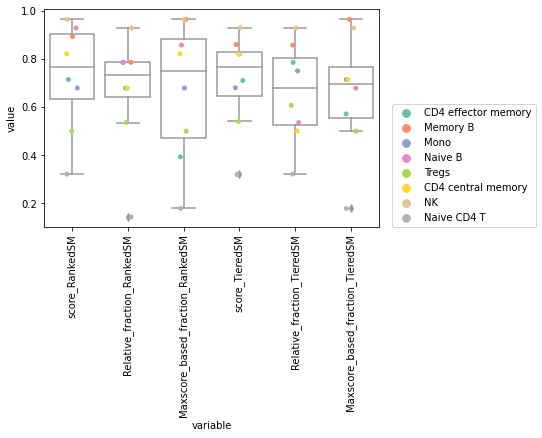

In [3]:
plotter(indf)

In [4]:
#indf['id']=indf.index
df = pd.wide_to_long(indf, stubnames=stubnamestouse, i='celltype', j='SM',suffix=suffixtouse,sep='_').reset_index()
df.head()

,celltype,SM,score,Relative_fraction,Maxscore_based_fraction
0,CD4 effector memory,RankedSM,0.714286,0.678571,0.392857
1,Memory B,RankedSM,0.892857,0.785714,0.964286
2,Mono,RankedSM,0.678571,0.785714,0.678571
3,Naive B,RankedSM,0.928571,0.785714,0.857143
4,Tregs,RankedSM,0.500000,0.535714,0.500000


In [5]:
dfmelt = df.melt(id_vars=['SM','celltype'])
dfmelt

,SM,celltype,variable,value
0,RankedSM,CD4 effector memory,score,0.714286
1,RankedSM,Memory B,score,0.892857
2,RankedSM,Mono,score,0.678571
3,RankedSM,Naive B,score,0.928571
4,RankedSM,Tregs,score,0.500000
5,RankedSM,CD4 central memory,score,0.821429
6,RankedSM,NK,score,0.964286
7,RankedSM,Naive CD4 T,score,0.321429
8,TieredSM,CD4 effector memory,score,0.710000
9,TieredSM,Memory B,score,0.860000


In [6]:
uniqeSM=list(set(dfmelt['SM'].tolist()))
uniqeVariable=list(set(dfmelt['variable'].tolist()))
boxtouse=list(itertools.product(uniqeVariable,uniqeSM))
#boxtouse=list(itertools.product(boxtouse,boxtouse))
boxtouse

[('score', 'RankedSM'),
 ('score', 'TieredSM'),
 ('Maxscore_based_fraction', 'RankedSM'),
 ('Maxscore_based_fraction', 'TieredSM'),
 ('Relative_fraction', 'RankedSM'),
 ('Relative_fraction', 'TieredSM')]

Using zero_method  pratt
Relative_fraction_RankedSM v.s. Relative_fraction_TieredSM: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.000e+00 stat=1.600e+01
Using zero_method  pratt
score_RankedSM v.s. score_TieredSM: Wilcoxon test (paired samples) with Bonferroni correction, P_val=7.001e-01 stat=9.500e+00
Using zero_method  pratt
Maxscore_based_fraction_RankedSM v.s. Maxscore_based_fraction_TieredSM: Wilcoxon test (paired samples) with Bonferroni correction, P_val=1.000e+00 stat=1.250e+01


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


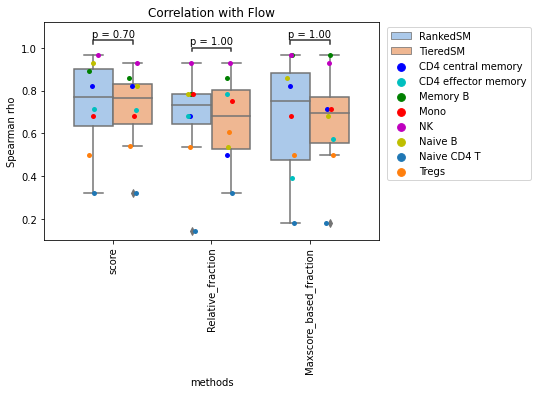

In [7]:
from statannot import add_stat_annotation
import matplotlib.pyplot as plt
import numpy as np
order =stubnamestouse #np.unique(np.array(dfmelt['variable']))[::-1]
#print(np.unique(np.array(dfmelt['variable'])))
#print(order)
cells = np.unique(np.array(dfmelt['celltype']))
#colors = sns.color_palette("gist_ncar", len(cells))
colors = ['b','c','g','r','m','y','tab:blue','tab:orange','tab:purple','tab:pink','darkviolet','dodgerblue', 'coral', 'brown']

#colors = sns.color_palette('Set2',len(cells))


ax=sns.boxplot(x="variable", y="value", data=dfmelt,hue='SM',palette='pastel', order=order)
for i, cell in enumerate(cells):
    sns.stripplot(x="variable", y="value", data=dfmelt[dfmelt['celltype'] == cell],hue='SM',\
                     dodge=True,marker='o', ax=ax,palette=[colors[i]] * 2, order=order)
    #sns.stripplot(x="variable", y="value", data=dfmelt[dfmelt['celltype'] == cell],hue='SM',\
     #                 dodge=True,marker='o', ax=ax,color=colors[i], order=order)
add_stat_annotation(ax, x="variable", y="value", data=dfmelt,hue='SM',
                    box_pairs=[(('Maxscore_based_fraction', 'TieredSM'),('Maxscore_based_fraction', 'RankedSM')),(('Relative_fraction', 'TieredSM'),('Relative_fraction', 'RankedSM')),(('score', 'TieredSM'),('score', 'RankedSM'))],test='Wilcoxon', text_format='simple', loc='inside') #[( ( "score","RankedSM"),( "score","TieredSM")),( ( "Oldcellularfraction","RankedSM"),( "Oldcellularfraction","TieredSM")),( ( "Maxscore_basedcellularfraction","RankedSM"),( "Maxscore_basedcellularfraction","TieredSM"))]
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylabel(ylabel)
ax.set_xlabel('methods')
ax.set_title(title)
handles, labels = ax.get_legend_handles_labels()
handles_new = handles[:2]
for i in range(2, len(handles), 2):
    handles_new += [handles[i]]
labels = labels[:2] + list(cells)
ax.legend(handles_new, labels, bbox_to_anchor=(1.01, 1.0), loc='upper left')
#ax.legend(loc=(1.01, 0.0))
# specify just one legend
# l = plt.legend(loc=(1.02, 0.01))
#ax.legend(loc=(1.04,0))

plt.savefig(infile + '_boxplot.pdf', bbox_inches='tight')